<a href="https://colab.research.google.com/github/Quanghoaai/Podo/blob/main/D%E1%BB%B1_%C3%A1n_X%C3%A2y_d%E1%BB%B1ng_m%E1%BB%99t_ch%C6%B0%C6%A1ng_tr%C3%ACnh_d%E1%BB%B1_%C4%91o%C3%A1n_gi%C3%A1_c%E1%BB%95_phi%E1%BA%BFu_s%E1%BB%AD_d%E1%BB%A5ng_h%E1%BB%8Dc_m%C3%A1y_(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.3212 - val_loss: 0.0028
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0347 - val_loss: 0.0028
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0143 - val_loss: 0.0251
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0272 - val_loss: 0.0062
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0132 - val_loss: 0.0013
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0152 - val_loss: 1.9289e-04
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0103 - val_loss: 0.0035
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0122 - val_loss: 0.0017
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0083 - val_loss: 2.2542e-04
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0096 - val_loss: 3.4500e-04
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0081 - val_loss: 0.0022
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0103 - va

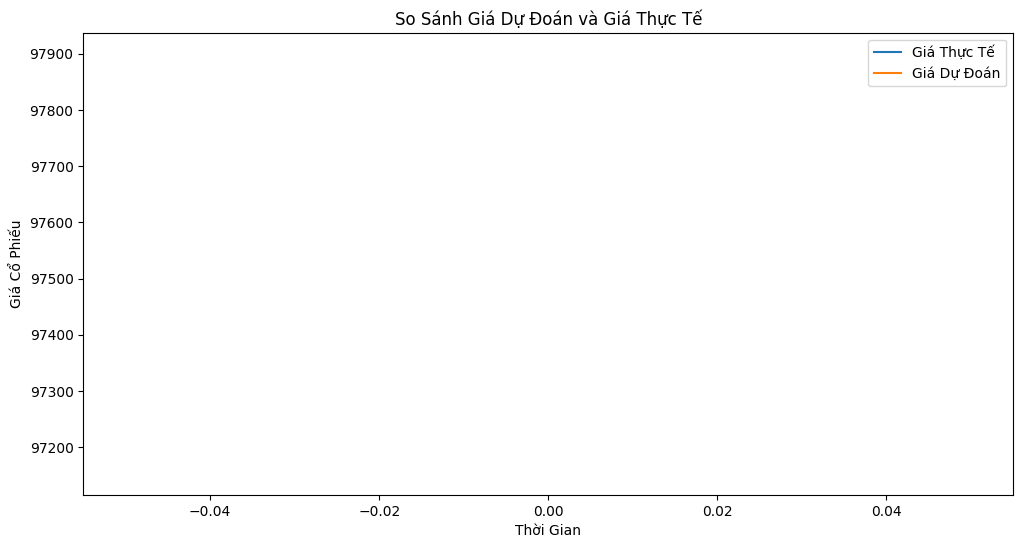

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Giá dự đoán cho ngày tiếp theo: 97243.0724509945


In [ ]:
# Cài đặt các thư viện cần thiết
!pip install yfinance
!pip install scikit-learn
!pip install tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Chọn mã cổ phiếu và khoảng thời gian
ticker = "PNJ.VN"  # Ví dụ: Cổ phiếu Apple
start_date = "2018-01-01"
end_date = "2025-01-01"

# Tải dữ liệu từ Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Tính toán đường trung bình động (SMA) - Tự tính toán bằng Pandas
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Tính toán RSI - Tự tính toán bằng Pandas
def calculate_rsi(data, time_window):
    diff = data.diff(1).dropna() # Tính độ biến thiên
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[ diff>0 ]
    down_chg[diff < 0] = diff[ diff < 0 ]
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

data['RSI'] = calculate_rsi(data['Close'], 14)

# Loại bỏ các hàng chứa giá trị NaN (Not a Number) do các chỉ báo kỹ thuật tạo ra
data.dropna(inplace=True)

# Chọn các cột làm đặc trưng (features)
features = ['Close', 'SMA_50', 'RSI']  # Loại bỏ SlowK và SlowD

# Chuẩn hóa dữ liệu về khoảng [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
training_data_len = int(np.ceil(len(scaled_data) * 0.8))  # 80% cho huấn luyện
train_data = scaled_data[0:training_data_len]
test_data = scaled_data[training_data_len:]

# Tạo các tập dữ liệu X_train, y_train, X_test, y_test cho LSTM
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, :])
        y.append(dataset[i, 0])  # Dự đoán giá đóng cửa (cột đầu tiên)
    return np.array(X), np.array(y)

time_step = 60  # Sử dụng 60 ngày trước đó để dự đoán
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# In ra kiến trúc mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1)

# Dự đoán giá trên tập kiểm tra
predictions = model.predict(X_test)

# Đảo ngược quá trình chuẩn hóa để có giá trị thực tế
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), len(features)-1))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((len(y_test), len(features)-1))), axis=1))[:,0]

# Tính toán RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

# Vẽ biểu đồ so sánh giá dự đoán và giá thực tế
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Giá Thực Tế")
plt.plot(predictions, label="Giá Dự Đoán")
plt.xlabel("Thời Gian")
plt.ylabel("Giá Cổ Phiếu")
plt.title("So Sánh Giá Dự Đoán và Giá Thực Tế")
plt.legend()
plt.show()

# Lấy dữ liệu giá gần nhất (time_step ngày)
last_data = scaled_data[-time_step:]

# Reshape dữ liệu để phù hợp với đầu vào của mô hình
last_data = last_data.reshape((1, time_step, len(features)))

# Dự đoán giá ngày tiếp theo
predicted_price = model.predict(last_data)

# Đảo ngược quá trình chuẩn hóa
predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((1, len(features)-1))), axis=1))[:,0]

print("Giá dự đoán cho ngày tiếp theo:", predicted_price[0])

Nhập mã cổ phiếu (ví dụ: PNJ.VN): MSB.VN


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 60, 50)              │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,301 (126.18 KB)

 Trainable params: 32,301 (126.18 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0522 - val_loss: 0.0032
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0109 - val_loss: 0.0023
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0078 - val_loss: 0.0023
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0061 - val_loss: 0.0024
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0072 - val_loss: 0.0032
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0059 - val_loss: 0.0021
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0053 - val_loss: 0.0023
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
RMSE: 474.6159286325479


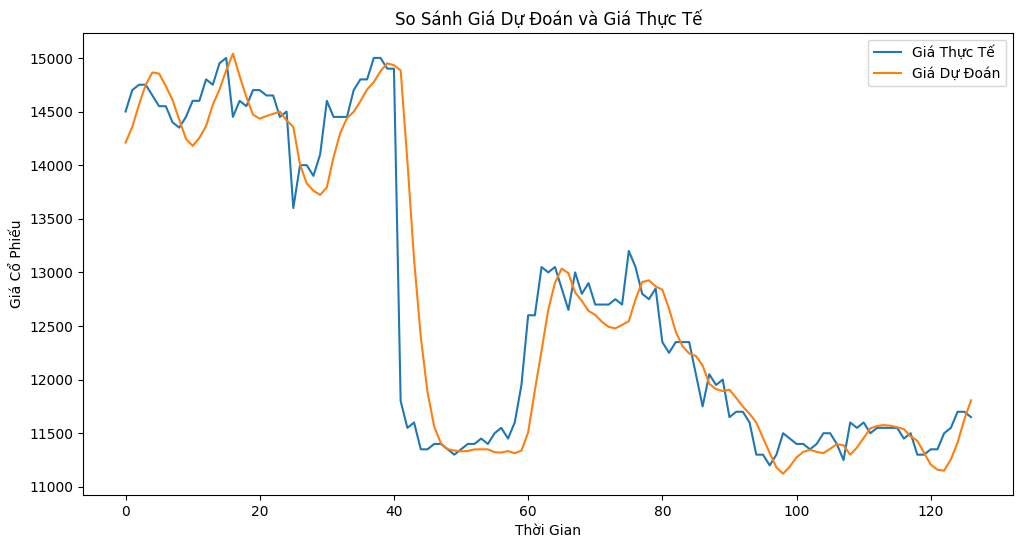

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Giá dự đoán cho ngày tiếp theo: 11883.01374817919


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
# Cài đặt các thư viện cần thiết
!pip install yfinance
!pip install scikit-learn
!pip install tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Nhập mã cổ phiếu từ người dùng
ticker = input("Nhập mã cổ phiếu (ví dụ: PNJ.VN): ")

start_date = "2018-01-01"
end_date = "2025-01-01"

# Tải dữ liệu từ Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Tính toán đường trung bình động (SMA) - Tự tính toán bằng Pandas
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Tính toán RSI - Tự tính toán bằng Pandas
def calculate_rsi(data, time_window):
    diff = data.diff(1).dropna() # Tính độ biến thiên
    up_chg = 0 * diff
    down_chg = 0 * diff
    up_chg[diff > 0] = diff[ diff>0 ]
    down_chg[diff < 0] = diff[ diff < 0 ]
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

data['RSI'] = calculate_rsi(data['Close'], 14)

# Loại bỏ các hàng chứa giá trị NaN (Not a Number) do các chỉ báo kỹ thuật tạo ra
data.dropna(inplace=True)

# Chọn các cột làm đặc trưng (features)
features = ['Close', 'SMA_50', 'RSI']  # Loại bỏ SlowK và SlowD

# Chuẩn hóa dữ liệu về khoảng [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
training_data_len = int(np.ceil(len(scaled_data) * 0.8))  # 80% cho huấn luyện
train_data = scaled_data[0:training_data_len]
test_data = scaled_data[training_data_len:]

# Tạo các tập dữ liệu X_train, y_train, X_test, y_test cho LSTM
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, :])
        y.append(dataset[i, 0])  # Dự đoán giá đóng cửa (cột đầu tiên)
    return np.array(X), np.array(y)

time_step = 60  # Sử dụng 60 ngày trước đó để dự đoán
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# In ra kiến trúc mô hình
model.summary()

# Huấn luyện mô hình
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1)

# Dự đoán giá trên tập kiểm tra
predictions = model.predict(X_test)

# Đảo ngược quá trình chuẩn hóa để có giá trị thực tế
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), len(features)-1))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((len(y_test), len(features)-1))), axis=1))[:,0]

# Tính toán RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

# Vẽ biểu đồ so sánh giá dự đoán và giá thực tế
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Giá Thực Tế")
plt.plot(predictions, label="Giá Dự Đoán")
plt.xlabel("Thời Gian")
plt.ylabel("Giá Cổ Phiếu")
plt.title("So Sánh Giá Dự Đoán và Giá Thực Tế")
plt.legend()
plt.show()

# Lấy dữ liệu giá gần nhất (time_step ngày)
last_data = scaled_data[-time_step:]

# Reshape dữ liệu để phù hợp với đầu vào của mô hình
last_data = last_data.reshape((1, time_step, len(features)))

# Dự đoán giá ngày tiếp theo
predicted_price = model.predict(last_data)

# Đảo ngược quá trình chuẩn hóa
predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((1, len(features)-1))), axis=1))[:,0]

print("Giá dự đoán cho ngày tiếp theo:", predicted_price[0])